# Exploratory Data Analysis: Tweets and MN511
> Jasmine Vasandani

This notebook conducts tests and exploratory data analysis on tweetts and other text announcements. Here, we implement NLP to understand the components of a road closure announcement. To view our refined process, please see the Modeling and Activation notebooks. This notebook is preserved to document our process of discovery and is meant to be like a pythonic sketchpad where we test out various methods to extract location from text towards the end (on tweets).

**Note**: Please view the specific location extraction notebook to see a more refined process for how we extracted location from text-with-no-geotags. 

# Import Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

### Bar Plot Function

In [63]:
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(10,6))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Enable bar values
    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

# Import Data

In [64]:
df = pd.read_csv('./data/alldata_update.csv')

In [65]:
df.columns

Index(['Unnamed: 0', 'date', 'text', 'keywords', 'location', 'source'], dtype='object')

In [66]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [67]:
df.head()

,date,text,keywords,location,source
0,2019-04-12 12:40:24+00:00,Crash at Hwy 12/25 south of Buffalo. Traffic i...,NaN,NaN,twitter
1,2019-04-12 00:05:20+00:00,"WB I-94, west of Sauk Centre- closed due to du...",NaN,NaN,twitter
2,2019-04-11 22:30:44+00:00,No travel advised on Hwy 169 along the west si...,NaN,NaN,twitter
3,2019-04-11 22:17:09+00:00,No Travel Advised has been expanded to include...,#Stearns #centralMN,NaN,twitter
4,2019-04-11 19:49:47+00:00,No Travel Advisory issued for I-94 through @St...,NaN,NaN,twitter


In [68]:
df.shape

(14233, 5)

In [69]:
df.isnull().sum()

date            0
text            1
keywords    10376
location    14219
source          0
dtype: int64

In [70]:
df['source'].value_counts()

twitter    13219
newsapi     1000
mn511         14
Name: source, dtype: int64

# MN 511

In [71]:
df_511 = df[df['source'] == 'mn511']
df_511.reset_index(drop=True, inplace=True)
df_511

,date,text,keywords,location,source
0,date,Between MN 93; North 5th Street and US 169 (ne...,MN 19: Flooding.,"[('North 5th Street', 'GPE'), ('Henderson', 'G...",mn511
1,date,Between US 169 (Le Sueur) and MN 19; North 5th...,MN 93: Flooding.,"[('US', 'GPE')]",mn511
2,date,At Fern Street North (Cambridge). The road is ...,MN 95: Road closed.,[],mn511
3,date,Between 220th Avenue and 230th Avenue (Halstad...,US 75 in both directions: Flooding.,[],mn511
4,date,Between North Dakota State Line (Oslo) and 470...,MN 1: Flooding.,"[('North Dakota', 'GPE'), ('Oslo', 'GPE'), ('A...",mn511
5,date,Between US 169; Chestnut Boulevard (near Carve...,MN 41: Flooding.,"[('US', 'GPE'), ('Carver', 'GPE'), ('Chaska', ...",mn511
6,date,Between North Dakota State Line and MN 220. Lo...,MN 317: Flooding.,"[('North Dakota State Line', 'GPE')]",mn511
7,date,Between MN 1; 490th Avenue Northwest and 390th...,MN 220: Flooding.,"[('Oslo', 'GPE')]",mn511
8,date,At Northeast 3rd Street (Climax). Look out for...,US 75 in both directions: Flooding.,[],mn511
9,date,Between MN 200; 3rd Street East and 250th Aven...,US 75 in both directions: Flooding.,[],mn511


In [72]:
for i in range(len(df_511)):
    print(df_511['text'].loc[i])
    print("-----------------------------------------------------------------------------------------")

Between MN 93; North 5th Street and US 169 (near Henderson). Look out for flooding. The road is closed.
-----------------------------------------------------------------------------------------
Between US 169 (Le Sueur) and MN 19; North 5th Street (Henderson). Look out for flooding. The road is closed.
-----------------------------------------------------------------------------------------
At Fern Street North (Cambridge). The road is closed. There is a broken water main.
-----------------------------------------------------------------------------------------
Between 220th Avenue and 230th Avenue (Halstad). Look out for flooding. The road is closed. A detour is in operation.
-----------------------------------------------------------------------------------------
Between North Dakota State Line (Oslo) and 470th Avenue Northwest (near Alvarado). Look out for flooding. The road is closed.
-----------------------------------------------------------------------------------------
Between 

### CountVectorizer(ngram(1,1)) on MN511

In [73]:
# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words = 'english')

# Fit and transform the vectorizer on our corpus
cvec = cv.fit_transform(df_511['text'])

# Convert cvec into a DataFrame
mn511_cvec = pd.DataFrame(cvec.toarray(),
                   columns=cv.get_feature_names())

# Inspect new DF
print(mn511_cvec.shape)
mn511_cvec.head(3)

(14, 74)


,00pm,13,169,19,1st,200,220,220th,230th,250th,...,state,street,sueur,surface,today,traffic,use,wabasha,water,west
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


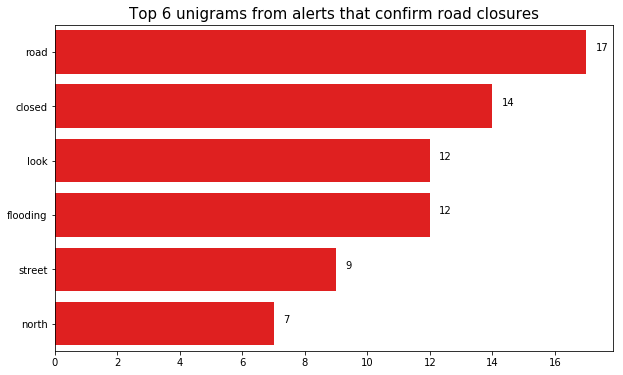

In [74]:
# Set up variables to contain top 5 most used words in Onion
mn511_cvec_wc1 = mn511_cvec.sum(axis = 0).sort_values(ascending=False).head(6)

# Call bar plot function
bar_plot(mn511_cvec_wc1.values, mn511_cvec_wc1.index, 'Top 6 unigrams from alerts that confirm road closures','r')


**Analysis**: 
- "road", "closed", "look", "flooding" are alert words that describe a road closure, while the rest of the words indicate location.

### CountVectorizer(ngram(2,2)) on MN511

In [75]:
# Instantiate a CountVectorizer
cv2 = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

# Fit and transform the vectorizer on our corpus
cvec2 = cv2.fit_transform(df_511['text'])

# Convert cvec into a DataFrame
mn511_cvec2 = pd.DataFrame(cvec2.toarray(),
                   columns=cv2.get_feature_names())

# Inspect new DF
print(mn511_cvec2.shape)
mn511_cvec2.head(3)

(14, 114)


,00pm cdt,13 miles,169 chestnut,169 le,169 near,19 north,1st street,200 3rd,220 look,220th avenue,...,street north,street northwest,sueur mn,surface collapsed,today 00pm,traffic road,use detour,wabasha look,water main,west wabasha
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


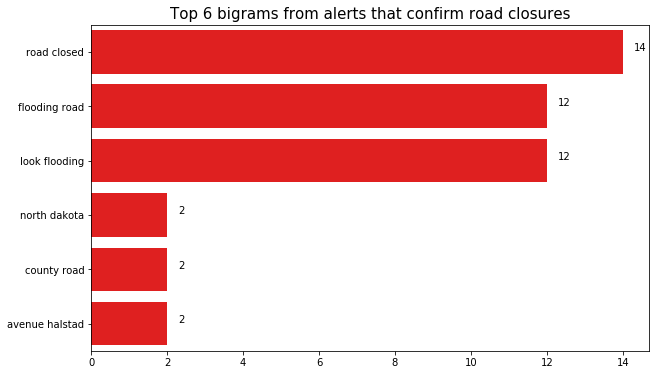

In [76]:
# Set up variables to contain top 5 most used words in Onion
mn511_cvec_wc2 = mn511_cvec2.sum(axis = 0).sort_values(ascending=False).head(6)

# Call bar plot function
bar_plot(mn511_cvec_wc2.values, mn511_cvec_wc2.index, 'Top 6 bigrams from alerts that confirm road closures','r')


**Analysis**:
 - of all the MN 511 announcements, _all_ mentioned the words "road" and "closed"

### CountVectorizer(ngram(3,3)) on MN511

In [77]:
# Instantiate a CountVectorizer
cv3 = CountVectorizer(stop_words = 'english', ngram_range=(3,3))

# Fit and transform the vectorizer on our corpus
cvec3 = cv3.fit_transform(df_511['text'])

# Convert cvec into a DataFrame
mn511_cvec3 = pd.DataFrame(cvec3.toarray(),
                   columns=cv3.get_feature_names())

# Inspect new DF
print(mn511_cvec3.shape)
mn511_cvec3.head(3)

(14, 119)


,13 miles north,169 chestnut boulevard,169 le sueur,169 near henderson,19 north 5th,1st street near,200 3rd street,220 look flooding,220th avenue 230th,230th avenue halstad,...,street mile east,street near chaska,street north cambridge,street northwest 13,sueur mn 19,today 00pm cdt,traffic road surface,use detour possible,wabasha look flooding,west wabasha look
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


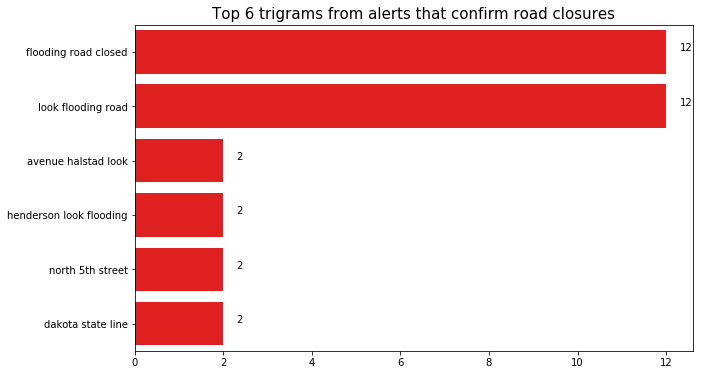

In [78]:
# Set up variables to contain top 5 most used words in Onion
mn511_cvec_wc3 = mn511_cvec3.sum(axis = 0).sort_values(ascending=False).head(6)

# Call bar plot function
bar_plot(mn511_cvec_wc3.values, mn511_cvec_wc3.index, 'Top 6 trigrams from alerts that confirm road closures','r')


# Twitter

In [79]:
df_twitter = df[df['source'] == 'twitter']

In [80]:
print(f'Twitter shape {df_twitter.shape}')
df_twitter.head(20)

Twitter shape (13219, 5)


,date,text,keywords,location,source
0,2019-04-12 12:40:24+00:00,Crash at Hwy 12/25 south of Buffalo. Traffic i...,NaN,NaN,twitter
1,2019-04-12 00:05:20+00:00,"WB I-94, west of Sauk Centre- closed due to du...",NaN,NaN,twitter
2,2019-04-11 22:30:44+00:00,No travel advised on Hwy 169 along the west si...,NaN,NaN,twitter
3,2019-04-11 22:17:09+00:00,No Travel Advised has been expanded to include...,#Stearns #centralMN,NaN,twitter
4,2019-04-11 19:49:47+00:00,No Travel Advisory issued for I-94 through @St...,NaN,NaN,twitter
5,2019-04-11 17:21:30+00:00,I-94 Clearwater to St. Cloud - all lanes are n...,#centralMN,NaN,twitter
6,2019-04-11 16:41:28+00:00,I-94 Clearwater to St. Cloud - both directions...,NaN,NaN,twitter
7,2019-04-11 14:26:49+00:00,Eastbound I-94 Monticello to Albertville - all...,#centralMN,NaN,twitter
8,2019-04-11 12:33:31+00:00,Hazardous driving conditions with ice covered ...,#Sherburne,NaN,twitter
9,2019-04-11 10:32:42+00:00,Eastbound I-94 Monticello to Albertville - clo...,NaN,NaN,twitter


In [81]:
mask_road = df_twitter['text'].str.contains('road', regex=False, case=False)
mask_closed = df_twitter['text'].str.contains('closed', regex=False, case=False)
df_twitter_closures = df_twitter[mask_road & mask_closed]

In [82]:
df_twitter_closures.reset_index(inplace=True)
df_twitter_closures.drop(['index'], axis=1, inplace=True)
df_twitter_closures.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,date,text,keywords,location,source
0,2019-04-11 16:41:28+00:00,I-94 Clearwater to St. Cloud - both directions...,NaN,NaN,twitter
1,2019-04-11 12:33:31+00:00,Hazardous driving conditions with ice covered ...,#Sherburne,NaN,twitter
2,2019-03-22 21:44:50+00:00,Hwy 95 at Fanny Lake Road just east of Cambrid...,NaN,NaN,twitter
3,2019-03-14 19:53:18+00:00,Ramp from Stearns County Road 75 to eastbound ...,NaN,NaN,twitter
4,2019-02-20 20:03:32+00:00,Correction/update - EB I-94 at Hwy 4 near Melr...,NaN,NaN,twitter


In [83]:
df_twitter_closures.head()

,date,text,keywords,location,source
0,2019-04-11 16:41:28+00:00,I-94 Clearwater to St. Cloud - both directions...,NaN,NaN,twitter
1,2019-04-11 12:33:31+00:00,Hazardous driving conditions with ice covered ...,#Sherburne,NaN,twitter
2,2019-03-22 21:44:50+00:00,Hwy 95 at Fanny Lake Road just east of Cambrid...,NaN,NaN,twitter
3,2019-03-14 19:53:18+00:00,Ramp from Stearns County Road 75 to eastbound ...,NaN,NaN,twitter
4,2019-02-20 20:03:32+00:00,Correction/update - EB I-94 at Hwy 4 near Melr...,NaN,NaN,twitter


# Location Extraction
Various resources we collected to further explore location extraction. 

1. [OSMxtract](https://pypi.org/project/osmxtract/)
  - uses the Overpass API to fetch OpenStreetMap features and export them in a GeoJSON file.
  - [OSMxtract how-to-guide](https://geoffboeing.com/2016/11/osmnx-python-street-networks/)


2. [mordecai](https://github.com/openeventdata/mordecai)
  - Extract the place names from a piece of text, resolve them to the correct place, and return their coordinates and structured geographic information.


3. [Auto GIS](https://automating-gis-processes.github.io/2017/lessons/L7/network-analysis.html)
  - Test the routing functionalities of osmnx by finding a shortest path between two points based on drivable roads.


4. [Geo-location Python](https://github.com/slawek87/geolocation-python)
  - This application allows you to get information about given location Application returns such information as: country, city, route/street, street number, reverse geocode, lat and lng, travel distance and time for a matrix of origins and destinations.
  

5. [pyap](https://github.com/vladimarius/pyap)
  - for detecting and parsing addresses


6. [geoextract](https://github.com/stadt-karlsruhe/geoextract)
  - for extracting locations (addresses, street names, points of interest) from free-form text.


7. [pygeocodio](https://github.com/bennylope/pygeocodio)
  - A Python wrapper for the Geocodio geolocation service API


8. [python-googlegeocoder](https://github.com/datadesk/python-googlegeocoder)
  - A simple Python wrapper for version three of Google's geocoder API 


9. [geopy](https://github.com/geopy/geopy)
  - locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.
  
  
10. [GeoExtract](https://github.com/stadt-karlsruhe/geoextract)
  - for extracting locations (addresses, street names, points of interest) from free-form text.


11. [LexicalGeography](https://github.com/LambertOSU/LexicalGeography)
  - for extracting location data from text


12. [spacy](https://spacy.io/usage/linguistic-features)


13. [Quora ML and NLP location extraction](https://www.quora.com/How-can-I-identify-location-from-any-text-message-using-ML-or-NLP)


14. [TDS article question](https://towardsdatascience.com/nlp-extracting-location-from-text-aa99c55e77d5)


15. [StackOverFlow: methods for extracting location from text](https://stackoverflow.com/questions/17762516/methods-for-extracting-locations-from-text)

# Testing Spacy

**NOTE**: try using spacy in combo with regex. do a test run on all text with spacy and see what's left out. try also dropping stop words. also try n_gramming words so that 2 and 3 are all in one sentence. then do spacy to grab.

In [5]:
import spacy

In [116]:
nlp = spacy.load("en_core_web_sm")


In [52]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Interstate 94 and 255th Avenue (near Granite Falls). Look out for flooding. The road is closed.")

for ent in doc.ents:
    print(f'text: {ent.text}\n start: {ent.start_char}\n end: {ent.end_char}\n label: {ent.label_}')

text: Interstate 94
 start: 0
 end: 13
 label: FAC
text: 255th Avenue
 start: 18
 end: 30
 label: FAC
text: Granite Falls
 start: 37
 end: 50
 label: PERSON


In [202]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("At Interstate 94 and 255th Avenue (near Granite Falls). Look out for flooding. The road is closed.")
lst = []
for ent in doc.ents:
    lst.append(ent.text)

In [203]:
lst

['Interstate 94', '255th Avenue', 'Granite Falls']

In [ ]:

    nlp = spacy.load("en_core_web_sm")
    doc = nlp(df_twitter_closures_ngram['no_btwn'].iloc[i])
    for ent in doc.ents:
        lst = []
        lst.append(ent.text)
        df_twitter_closures_ngram['no_btwn_spacy'].iloc[i] = lst

In [101]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(u"[(Between 558th), (558th Street), (Street and), (and 225th), (255th Street) (near Granite Falls). (Look out for flooding. The road is closed.)]")

for ent in doc.ents:
    #print(f'location: {ent.text}\n start: {ent.start_char}\n end: {ent.end_char}\n label: {ent.label_}')
    print(f'location: {ent.text}')
    
    

location: 558th Street
location: 225th
location: 255th Street
location: Granite Falls


spacy recognized 558th street after I n-grammed. Could filter so that it's more than one word to avoid getting single numbers. 

# CountVec DataFrame 

`ngram_range = (3,3)`

In [87]:
# Instantiate a CountVectorizer
#cv = CountVectorizer(lowercase=False, token_pattern=r"\b\w+\b", ngram_range=(2,3))

cv = CountVectorizer(lowercase=False, token_pattern=r"\b\w+\b", stop_words='english', ngram_range=(2,3))

# Fit and transform the vectorizer on our corpus
cvec = cv.fit_transform(df_twitter_closures['text'])

# Convert cvec into a DataFrame
df_twitter_closures_cvec = pd.DataFrame(cvec.toarray(),
                   columns=cv.get_feature_names())

# Inspect new DF
print(df_twitter_closures_cvec.shape)
df_twitter_closures_cvec.head(3)

(236, 8109)


,000 90,000 90 days,000 sentenced,000 sentenced 90,03 19,03 19 westbound,03 20,03 20 closed,03 27,03 27 hwy60,...,www 511,www 511 org,www 511mn,www 511mn org,www dot,www dot state,www facebook,www facebook com,y63 resurfacing,y63 resurfacing pic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Create empty column to put all combined words
df_twitter_closures_cvec['text_combined'] = ''

In [89]:
for column in df_twitter_closures_cvec.columns:
    for i in range(len(df_twitter_closures_cvec)):
        if df_twitter_closures_cvec[column].loc[i] != 0:
            df_twitter_closures_cvec['text_combined'].loc[i] += ('('+column+')'+' ')
            
df_twitter_closures_cvec.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,000 90,000 90 days,000 sentenced,000 sentenced 90,03 19,03 19 westbound,03 20,03 20 closed,03 27,03 27 hwy60,...,www 511 org,www 511mn,www 511mn org,www dot,www dot state,www facebook,www facebook com,y63 resurfacing,y63 resurfacing pic,text_combined
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(94 Clearwater) (94 Clearwater St) (Clearwater...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(94 remains) (94 remains closed) (Albertville ...
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(95 Fanny) (95 Fanny Lake) (Cambridge closed) ...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(75 eastbound) (75 eastbound I) (94 temporaril...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(30 mph) (30 mph removing) (4 near) (4 near Me...


In [90]:
for i in range(3):
    print(df_twitter_closures_cvec['text_combined'].loc[i])
    print("-----------------------------------------------------------------------------------------")

(94 Clearwater) (94 Clearwater St) (Clearwater St) (Clearwater St Cloud) (Cloud directions) (Cloud directions closed) (I 94) (I 94 Clearwater) (Postpone travel) (Postpone travel possible) (Roads icy) (Roads icy compacted) (St Cloud) (St Cloud directions) (closed semi) (closed semi crashes) (compacted high) (compacted high winds) (crashes Roads) (crashes Roads icy) (directions closed) (directions closed semi) (high winds) (high winds Postpone) (icy compacted) (icy compacted high) (semi crashes) (semi crashes Roads) (travel possible) (winds Postpone) (winds Postpone travel) (text_combined) 
-----------------------------------------------------------------------------------------
(94 remains) (94 remains closed) (Albertville Consider) (Albertville Consider postponing) (BentonCountyMN Sherburne) (BentonCountyMN Sherburne Mille) (Consider postponing) (Consider postponing unnecessary) (Hazardous driving) (Hazardous driving conditions) (I 94) (I 94 remains) (Lacs counties) (Lacs counties I) (

# Concatenate ngram(1,3) to `df_twitter_closures`

In [91]:
df_twitter_closures['text'].iloc[1]

'Hazardous driving conditions with ice covered or compacted roads in nearly all of @StearnsCountyMN , @WrightCountyMN , @BentonCountyMN , #Sherburne and Mille Lacs counties. I-94 remains closed between Monticello and Albertville. Consider postponing any unnecessary travel.'

In [92]:
df_twitter_closures_ngram = df_twitter_closures

In [93]:
df_twitter_closures_ngram['ngrams'] = df_twitter_closures_cvec['text_combined']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
df_twitter_closures_ngram.head()

,date,text,keywords,location,source,ngrams
0,2019-04-11 16:41:28+00:00,I-94 Clearwater to St. Cloud - both directions...,NaN,NaN,twitter,(94 Clearwater) (94 Clearwater St) (Clearwater...
1,2019-04-11 12:33:31+00:00,Hazardous driving conditions with ice covered ...,#Sherburne,NaN,twitter,(94 remains) (94 remains closed) (Albertville ...
2,2019-03-22 21:44:50+00:00,Hwy 95 at Fanny Lake Road just east of Cambrid...,NaN,NaN,twitter,(95 Fanny) (95 Fanny Lake) (Cambridge closed) ...
3,2019-03-14 19:53:18+00:00,Ramp from Stearns County Road 75 to eastbound ...,NaN,NaN,twitter,(75 eastbound) (75 eastbound I) (94 temporaril...
4,2019-02-20 20:03:32+00:00,Correction/update - EB I-94 at Hwy 4 near Melr...,NaN,NaN,twitter,(30 mph) (30 mph removing) (4 near) (4 near Me...


## Apply SpaCy

In [95]:
df_twitter_closures_ngram['spacy_location'] = ''

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
for i in range(len(df_twitter_closures_ngram)):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(df_twitter_closures_ngram['ngrams'].iloc[i])
    for ent in doc.ents:
        df_twitter_closures_ngram['spacy_location'].iloc[i] += str(ent.text + ' ')
df_twitter_closures_ngram.head()    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,date,text,keywords,location,source,ngrams,spacy_location
0,2019-04-11 16:41:28+00:00,I-94 Clearwater to St. Cloud - both directions...,NaN,NaN,twitter,(94 Clearwater) (94 Clearwater St) (Clearwater...,94 Clearwater St St Cloud Cloud Cloud 94 St Cl...
1,2019-04-11 12:33:31+00:00,Hazardous driving conditions with ice covered ...,#Sherburne,NaN,twitter,(94 remains) (94 remains closed) (Albertville ...,94 94 Albertville Consider Albertville BentonC...
2,2019-03-22 21:44:50+00:00,Hwy 95 at Fanny Lake Road just east of Cambrid...,NaN,NaN,twitter,(95 Fanny) (95 Fanny Lake) (Cambridge closed) ...,95 Fanny Lake Cambridge Cambridge Fanny Lake F...
3,2019-03-14 19:53:18+00:00,Ramp from Stearns County Road 75 to eastbound ...,NaN,NaN,twitter,(75 eastbound) (75 eastbound I) (94 temporaril...,75 75 94 94 County Road County Road 75 94 94 R...
4,2019-02-20 20:03:32+00:00,Correction/update - EB I-94 at Hwy 4 near Melr...,NaN,NaN,twitter,(30 mph) (30 mph removing) (4 near) (4 near Me...,30 mph 30 mph Melrose 94 94 94 CentralMN 94 Ce...


In [97]:
for i in range(5):
    print(df_twitter_closures_ngram['spacy_location'].loc[i])
    print("-----------------------------------------------------------------------------------------")



94 Clearwater St St Cloud Cloud Cloud 94 St Cloud St Cloud Postpone Postpone Postpone 
-----------------------------------------------------------------------------------------
94 94 Albertville Consider Albertville BentonCountyMN Sherburne BentonCountyMN Sherburne Mille 94 94 Mille Lacs Mille Lacs Monticello Albertville Sherburne Mille Sherburne Mille Lacs WrightCountyMN BentonCountyMN WrightCountyMN BentonCountyMN Sherburne Monticello Monticello Albertville 94 StearnsCountyMN Monticello StearnsCountyMN 
-----------------------------------------------------------------------------------------
95 Fanny Lake Cambridge Cambridge Fanny Lake Fanny Lake Road Hwy 95 Lake Road Lake Road Traffic Traffic Traffic Cambridge Cambridge Cambridge 
-----------------------------------------------------------------------------------------
75 75 94 94 County Road County Road 75 94 94 Ramp Stearns Ramp Stearns County 75 75 Stearns County Stearns County Road 94 
-------------------------------------------

In [98]:
df_twitter_closures_ngram['spacy_location_no_ngram'] = ''

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
for i in range(len(df_twitter_closures_ngram)):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(df_twitter_closures_ngram['ngrams'].iloc[i])
    for ent in doc.ents:
        df_twitter_closures_ngram['spacy_location_no_ngram'].iloc[i] += str(ent.text + ' ')
df_twitter_closures_ngram.head()  

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,date,text,keywords,location,source,ngrams,spacy_location,spacy_location_no_ngram
0,2019-04-11 16:41:28+00:00,I-94 Clearwater to St. Cloud - both directions...,NaN,NaN,twitter,(94 Clearwater) (94 Clearwater St) (Clearwater...,94 Clearwater St St Cloud Cloud Cloud 94 St Cl...,94 Clearwater St St Cloud Cloud Cloud 94 St Cl...
1,2019-04-11 12:33:31+00:00,Hazardous driving conditions with ice covered ...,#Sherburne,NaN,twitter,(94 remains) (94 remains closed) (Albertville ...,94 94 Albertville Consider Albertville BentonC...,94 94 Albertville Consider Albertville BentonC...
2,2019-03-22 21:44:50+00:00,Hwy 95 at Fanny Lake Road just east of Cambrid...,NaN,NaN,twitter,(95 Fanny) (95 Fanny Lake) (Cambridge closed) ...,95 Fanny Lake Cambridge Cambridge Fanny Lake F...,95 Fanny Lake Cambridge Cambridge Fanny Lake F...
3,2019-03-14 19:53:18+00:00,Ramp from Stearns County Road 75 to eastbound ...,NaN,NaN,twitter,(75 eastbound) (75 eastbound I) (94 temporaril...,75 75 94 94 County Road County Road 75 94 94 R...,75 75 94 94 County Road County Road 75 94 94 R...
4,2019-02-20 20:03:32+00:00,Correction/update - EB I-94 at Hwy 4 near Melr...,NaN,NaN,twitter,(30 mph) (30 mph removing) (4 near) (4 near Me...,30 mph 30 mph Melrose 94 94 94 CentralMN 94 Ce...,30 mph 30 mph Melrose 94 94 94 CentralMN 94 Ce...


In [125]:
#df_twitter_closures_ngram.to_csv('./data/tweets_ngram_spacy.csv')

In [211]:
df_twitter_closures_ngram = pd.read_csv('./data/tweets_ngram_spacy.csv')

# Fixing tweets according to Spacy extraction

In [58]:
import re

In [212]:
# Create empty columns to place spacy locations
df_twitter_closures_ngram['no_btwn'] = ''

df_twitter_closures_ngram['no_btwn_spacy'] = ''

df_twitter_closures_ngram['no_btwn_1'] = ''

df_twitter_closures_ngram['no_btwn_spacy_1'] = ''

In [216]:
# Testing out various methods to refine location extraction process
for i in range(len(df_twitter_closures_ngram)):
    no_btwn = df_twitter_closures_ngram['text'].loc[i].replace("between ", '')
    no_btwn = no_btwn.replace("Between ", '')
    no_btwn = no_btwn.replace("In ", 'at ')
    no_btwn = no_btwn.replace(" in ", ' at ')
    no_btwn = "At " + no_btwn
    no_btwn = no_btwn.replace("Hwy", 'Highway')
    no_btwn = no_btwn.replace("I-", 'Interstate ')
    no_btwn = no_btwn.replace("EB ", 'Eastbound ')
    no_btwn = no_btwn.replace("WB ", 'Westbound ')
    no_btwn = re.sub('#[A-Za-z0-9\-\.\_]+(?:\s|$)', '', no_btwn)
    df_twitter_closures_ngram['no_btwn_1'].loc[i] = no_btwn

In [217]:
# Testing out various methods to refine location extraction process
for i in range(len(df_twitter_closures_ngram)):
    no_btwn = df_twitter_closures_ngram['text'].loc[i].replace("between ", 'at ')
    no_btwn = no_btwn.replace("Between ", 'at ')
    no_btwn = no_btwn.replace("In ", ' at ')
    no_btwn = no_btwn.replace(" in ", ' at ')
    no_btwn = no_btwn.replace("Hwy", 'Highway')
    no_btwn = no_btwn.replace("I-", 'Interstate ')
    no_btwn = no_btwn.replace("EB ", 'Eastbound ')
    no_btwn = no_btwn.replace("WB ", 'Westbound ')
    no_btwn = re.sub('#[A-Za-z0-9\-\.\_]+(?:\s|$)', '', no_btwn)
    df_twitter_closures_ngram['no_btwn'].loc[i] = no_btwn

In [219]:
# Testing out various methods to refine location extraction process
for i in range(len(df_twitter_closures_ngram.head(40))):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(df_twitter_closures_ngram['no_btwn_1'].iloc[i])
    lst = []
    for ent in doc.ents:
        if (ent.label_=='GPE') or (ent.label_=='FAC'):
            lst.append(ent.text)
            df_twitter_closures_ngram['no_btwn_spacy_1'].iloc[i] = set(lst)

In [220]:
# Testing out various methods to refine location extraction process
for i in range(len(df_twitter_closures_ngram.head(40))):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(df_twitter_closures_ngram['no_btwn'].iloc[i])
    lst = []
    for ent in doc.ents:
        if (ent.label_=='GPE') or (ent.label_=='FAC'):
            lst.append(ent.text)
            df_twitter_closures_ngram['no_btwn_spacy'].iloc[i] = set(lst)

In [236]:
for i in range(40):
    print("Location_1:", i, df_twitter_closures_ngram['no_btwn_spacy_1'].loc[i])
    print("Location:", i, df_twitter_closures_ngram['no_btwn_spacy'].loc[i])
    print("--------------------------------------------------")

Location_1: 0 {'St. Cloud'}
Location: 0 {'St. Cloud'}
--------------------------------------------------
Location_1: 1 {'Interstate 94'}
Location: 1 {'Interstate 94'}
--------------------------------------------------
Location_1: 2 {'Highway 95', 'Fanny Lake Road', 'Cambridge'}
Location: 2 {'Fanny Lake Road', 'Cambridge'}
--------------------------------------------------
Location_1: 3 {'Interstate 94', 'Stearns County Road 75'}
Location: 3 {'Interstate 94', 'Stearns County Road 75'}
--------------------------------------------------
Location_1: 4 {'Interstate 94', 'Highway 4', 'Melrose'}
Location: 4 {'Interstate 94', 'Highway 4', 'Melrose'}
--------------------------------------------------
Location_1: 5 {'Eastbound Interstate 94'}
Location: 5 
--------------------------------------------------
Location_1: 6 {'County Road 142'}
Location: 6 {'County Road 142'}
--------------------------------------------------
Location_1: 7 {'Kanabec'}
Location: 7 {'Kanabec'}
--------------------------

In [222]:
df_twitter_closures_ngram.columns

Index(['Unnamed: 0', 'date', 'text', 'keywords', 'location', 'source',
       'ngrams', 'spacy_location', 'spacy_location_no_ngram', 'no_btwn',
       'no_btwn_spacy', 'no_btwn_1', 'no_btwn_spacy_1'],
      dtype='object')

In [228]:
df_twitter_locations = df_twitter_closures_ngram.drop(columns=['Unnamed: 0', 
                                        'location', 
                                        'ngrams', 
                                        'spacy_location', 
                                        'spacy_location_no_ngram',
                                        'keywords',
                                        'source',
                                        'date',
                                        'no_btwn',
                                        'no_btwn_spacy',
                                        'no_btwn_1',
                                        'no_btwn_spacy_1'])

In [231]:
df_twitter_locations['altered_text_1'] = df_twitter_closures_ngram['no_btwn']
df_twitter_locations['altered_text_loc_1'] = df_twitter_closures_ngram['no_btwn_spacy']
df_twitter_locations['altered_text_2'] = df_twitter_closures_ngram['no_btwn_1']
df_twitter_locations['altered_text_loc_2'] = df_twitter_closures_ngram['no_btwn_spacy_1']

In [232]:
df_twitter_locations.head()

,text,altered_text_1,altered_text_loc_1,altered_text_2,altered_text_loc_2
0,I-94 Clearwater to St. Cloud - both directions...,Interstate 94 Clearwater to St. Cloud - both d...,{St. Cloud},At Interstate 94 Clearwater to St. Cloud - bot...,{St. Cloud}
1,Hazardous driving conditions with ice covered ...,Hazardous driving conditions with ice covered ...,{Interstate 94},At Hazardous driving conditions with ice cover...,{Interstate 94}
2,Hwy 95 at Fanny Lake Road just east of Cambrid...,Highway 95 at Fanny Lake Road just east of Cam...,"{Fanny Lake Road, Cambridge}",At Highway 95 at Fanny Lake Road just east of ...,"{Highway 95, Fanny Lake Road, Cambridge}"
3,Ramp from Stearns County Road 75 to eastbound ...,Ramp from Stearns County Road 75 to eastbound ...,"{Interstate 94, Stearns County Road 75}",At Ramp from Stearns County Road 75 to eastbou...,"{Interstate 94, Stearns County Road 75}"
4,Correction/update - EB I-94 at Hwy 4 near Melr...,Correction/update - Eastbound Interstate 94 at...,"{Interstate 94, Highway 4, Melrose}",At Correction/update - Eastbound Interstate 94...,"{Interstate 94, Highway 4, Melrose}"
